<a href="https://colab.research.google.com/github/valievav/Data-Science-Camp-Test-Tasks/blob/main/1_Deepest_lake_calc_for_2d_mountains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1**

Generate the sequence of 20 random integer values from 0 to 100.
Build the plot that joins each neighbour's values
[88, 26, 71, 56, 34, 93, 4, 53, 87, 97, 23, 18, 54, 48, 78, 40, 70, 89, 4, 59]

Consider the values as the heights of 2d mountains on which the rain falls
from above. Those subsequences that have larger values on boundaries
form the lakes.

1) Develop the function that accepts the list of provided 20 integer
values and calculates the depth of the deepest lake. Considering the
above example, the response should be 89 which is the depth of the
lake formed by subsequence [93, 4, 53, 87, 97].

2) Visualize the values as heights and highlight the deepest lake.

Response format:
Programming code in jupyter notebook/colab/etc. containing the following:

1) Generating list of 20 random values,

2) Function that calculates the depth of deepest lake

3) Visualization


In [1]:
# To find DEEPEST lake, we need to detect all lakes -> need to process all values.
# Time Complexity O(n²) Quadratic

import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def find_highest_peak(i, data, formed_by, mode):
  """
  Detect true peak on left or right side.

  Example: data = [5, 60, 50, 5, 40, 45, 30] -> valley detected
  outside of the function is formed by [50, 5, 40],
  current function widens the search and detects that valley
  formed by [60, 50, 5, 40, 45], so previous peaks 50 & 40 become slopes
  and real peaks are 60 & 45.
  """
  left = 'left'
  right = 'right'

  if mode not in {left, right}:
     raise ValueError(f'Wrong mode, expected values: {left, right}')

  # setup search values for right and left search
  if mode == left:
    iter_side = range(i-2, -1, -1)  # all elements on the left till the start
    peak = data[i-1]
    key = left
  else:
    iter_side = range(i+2, len(data))  # all elements on the right till the end
    peak = data[i+1]
    key = right

  # iterate left or right to find max peak
  for j in iter_side:

    # exit if next value is smaller (we already have the true peak)
    if data[j] < peak:
      return formed_by

    # else this is a slope and we need to search for max peak further
    peak = data[j]
    formed_by[key].append(peak)

  return formed_by


def calc_depth_of_deepest_lake(data, verbose=True):
  """
  Calculate deepest lake formed by 20 random numbers from 1 to 100.

  Algorithm used - process all elements to detect lake lowest point ->
  search iteratively on both right and left sides to find highest peaks ->
  calculate deepness of the lake.

  Assumptions:
  1. Lake cannot have peak inside it (so figure in a form of W
  will form 2 lakes, not 1, although water can cover it all
  and we can have 1 deep lake with peak in the water, but we dismiss such cases).
  2. If we have 2 lakes with the same deepness, we'll acknowledge only 1st.
  """
  lake = {'depth': None,
          'formed_by': None}

  for i in range(len(data)):

    # skip 1st and last value, since they have no neighbor to form peak or basin
    if i == 0 or i == len(data) - 1:
      continue

    # find bottom of the lake
    if data[i-1] > data[i] < data[i+1]:
      min_point = data[i]
      peak_left = data[i-1]
      peak_right = data[i+1]
      formed_by = {'left': [peak_left],
                   'min_point': min_point,
                   'right': [peak_right]}

      # find peak on each side to get the depth
      formed_by = find_highest_peak(i, data, formed_by, 'left')
      formed_by = find_highest_peak(i, data, formed_by, 'right')
      depth = min(max(formed_by['left']), max(formed_by['right'])) - min_point

      # record result with biggest depth
      if not lake['depth'] or depth > lake['depth']:
        lake['depth'] = depth
        lake['formed_by'] = formed_by
        if verbose:
          print(f'''Detected VALLEY >>>
          Peak LEFT == {formed_by['left']}, RIGHT == {formed_by['right']},
          MIN point == {formed_by['min_point']}, DEPTH == {depth}''')

  return lake


In [5]:
def test_detect_lake_with_right_slope_correctly():
  data = [34, 93, 4, 53, 87, 97, 23]
  exp_res = {'depth': 89, 'formed_by': {'left': [93], 'min_point': 4, 'right': [53, 87, 97]}}
  res = calc_depth_of_deepest_lake(data)
  assert res == exp_res


def test_detect_one_deep_lake_correctly():
  data = [100, 90, 60, 10, 80, 90, 95]
  exp_res = {'depth': 85, 'formed_by': {'left': [60, 90, 100], 'min_point': 10, 'right': [80, 90, 95]}}
  res = calc_depth_of_deepest_lake(data)
  assert res == exp_res


def test_W_form_detect_deepest_lake_correctly():
  data = [100, 90, 30, 50, 20, 90, 95]
  exp_res = {'depth': 30, 'formed_by': {'left': [50], 'min_point': 20, 'right': [90, 95]}}
  res = calc_depth_of_deepest_lake(data)
  assert res == exp_res


def test_W_form_detects_first_lake_correctly():
  data = [100, 90, 30, 50, 30, 90, 100]
  exp_res = {'depth': 20, 'formed_by': {'left': [90, 100], 'min_point': 30, 'right': [50]}}
  res = calc_depth_of_deepest_lake(data)
  assert res == exp_res


def test_one_peak_on_both_sides_detect_deepest_lake_correctly():
  data = [50, 90, 30, 50, 20, 90, 60]
  exp_res = {'depth': 30, 'formed_by': {'left': [50], 'min_point': 20, 'right': [90]}}
  res = calc_depth_of_deepest_lake(data)
  assert res == exp_res

test_detect_lake_with_right_slope_correctly()
test_detect_one_deep_lake_correctly()
test_W_form_detect_deepest_lake_correctly()
test_W_form_detects_first_lake_correctly()
test_one_peak_on_both_sides_detect_deepest_lake_correctly()


Detected VALLEY >>>
          Peak LEFT == [93], RIGHT == [53, 87, 97],
          MIN point == 4, DEPTH == 89
Detected VALLEY >>>
          Peak LEFT == [60, 90, 100], RIGHT == [80, 90, 95],
          MIN point == 10, DEPTH == 85
Detected VALLEY >>>
          Peak LEFT == [90, 100], RIGHT == [50],
          MIN point == 30, DEPTH == 20
Detected VALLEY >>>
          Peak LEFT == [50], RIGHT == [90, 95],
          MIN point == 20, DEPTH == 30
Detected VALLEY >>>
          Peak LEFT == [90, 100], RIGHT == [50],
          MIN point == 30, DEPTH == 20
Detected VALLEY >>>
          Peak LEFT == [90], RIGHT == [50],
          MIN point == 30, DEPTH == 20
Detected VALLEY >>>
          Peak LEFT == [50], RIGHT == [90],
          MIN point == 20, DEPTH == 30


[46, 45, 21, 91, 10, 1, 64, 47, 24, 44, 97, 93, 55, 6, 33, 81, 53, 85, 35, 27]


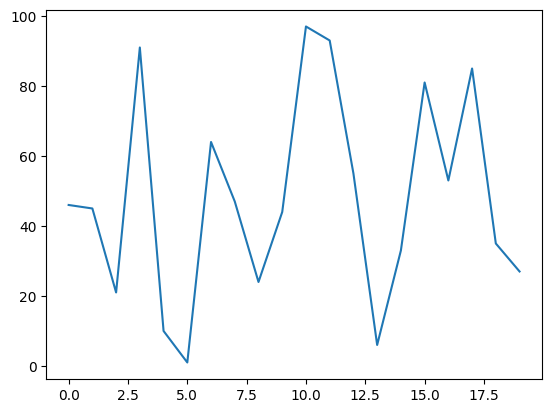

Detected VALLEY >>> 
          Peak LEFT == [45, 46], RIGHT == [91], 
          MIN point == 21, DEPTH == 25
Detected VALLEY >>> 
          Peak LEFT == [10, 91], RIGHT == [64], 
          MIN point == 1, DEPTH == 63
Detected VALLEY >>> 
          Peak LEFT == [55, 93, 97], RIGHT == [33, 81], 
          MIN point == 6, DEPTH == 75
Detected deepest lake with params {'depth': 75, 'formed_by': {'left': [55, 93, 97], 'min_point': 6, 'right': [33, 81]}}
[97, 93, 55, 6, 33, 81]


In [ ]:
data = random.sample(range(0,101), 20)
# data = [70, 89, 1, 72, 85, 15, 26, 30, 57, 99, 4, 65, 8, 43, 63, 41, 14, 61, 81, 37]
print(data)

# plot data
plt.plot(data)
plt.show()

# find deepest lake from the sequence of numbers
deepest_lake = calc_depth_of_deepest_lake(data)
print(f'Detected deepest lake with params {deepest_lake}')

# get list of values it was formed by
deepest_lake_list = sorted(deepest_lake['formed_by']['left'], reverse=True) + [deepest_lake['formed_by']['min_point']] + deepest_lake['formed_by']['right']
print(deepest_lake_list)


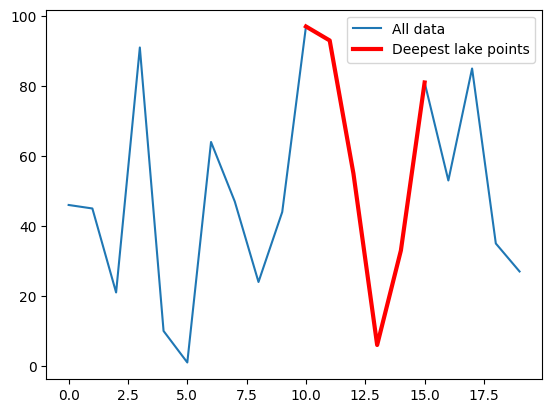

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Find indexes of the sublist to highlight
start_index = [
    i for i in range(len(data) - len(deepest_lake_list) + 1)
    if data[i:i + len(deepest_lake_list)] == deepest_lake_list
][0]  # assume that sublist can be matched only once
highlight_indexes = list(range(start_index, start_index + len(deepest_lake_list)))

# Plot original data in blue
plt.plot(data, label="All data")

# Plot the highlighted points in red
plt.plot(highlight_indexes, np.array(data)[highlight_indexes],
         color='red', linewidth=3, label="Deepest lake points")

plt.legend()
plt.show()
